# Reinforcement Learning through the lens of Optimisation. Bandits.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eleni-vasilaki/rl-notes/blob/main/notebooks/04_bandits.ipynb)

## Optimisation and Decision Making  

Imagine how you make choices in your life. Implicit in your choices, there is some form of optimisation.  

For instance, you try, when possible, to go to the university of your choice, selecting a topic of study that you believe will be most beneficial—perhaps because of career opportunities, personal interest, financial stability, or social connections. Often, it is a combination of these factors. Different things matter to different people, but in the end, you are **implicitly optimising** your life.  

Maybe you didn’t want to overthink everything, so you left part of the decision to chance. That means you optimised for something else—your energy, your well-being, your time. You chose to focus on something you value more, and you let luck determine the rest. That, too, is an implicit **optimisation**—choosing where to direct your effort.  

Now, think about how you make choices in friendships. On this planet, there may be a person who could be your best friend, someone whose personality and experiences align with yours in ways you haven’t yet discovered. But you may never meet them. The best friends you will ever have might still be strangers to you at this moment. I can certainly tell you that in my twenties, I had not yet met the best friends I would ever have.  

Or take romantic relationships, if that interests you. Even here, you are optimising something. Not everyone is optimising for the same thing—some people prioritise shared interests, others stability, others excitement. But almost everyone **optimises locally**.  

Let’s take dating or friendship as an example. Even if you search for connections online, thinking that you are broadening your options, your **search is still local**—it is constrained to the population that uses that particular platform, social media, or social environment you have chosen to engage with.  

While some people may feel they are making the **optimal** choices for their lives, in reality, our choices are wildly different because different things mean different benefits to each of us. And often, we make decisions under constraints. But one thing remains true: optimisation is at the heart of how we make choices.  

Here, we will discuss **gradient descent**, a popular optimisation method that looks for an optimal local solution. We will look at reinforcement learning within this framework—where what we are trying to optimise is **reward**. We will start with defining a system by a function of multiple parameters, which we want to maximise or minimise, and discuss how to do so using the concept of gradient.

## Convex Functions and Single Local Minima

Consider a system described mathematically by a function $f(x_1, x_2,\ldots, x_n)$. Such a function is known as **multivariable** because it accepts multiple variables as inputs simultaneously. A more compact way to describe it is by $f(\mathbf{x})$, where $\mathbf{x}=[x_1~x_2~x_3 \ldots]^T$ is a vector representing the parameters of the system. $T$ here is the operator "transposed," meaning rows become columns (and vice versa), as in mathematics, vectors are typically considered column vectors.

The goal of optimisation is to find the values of $\mathbf{x}$ that either minimise or maximise $f(\mathbf{x})$, depending on whether $f(\mathbf{x})$ is a measure of error or performance. When the function has a single extremum, it is possible to find its minimum or maximum through analytical methods. For a given function $f(\mathbf{x})$, direct minimisation involves calculating the values of $\mathbf{x}$ that lead to the lowest value of $f$.

More specifically, a **strictly convex function** $f(\mathbf{x})$, such as $f(\mathbf{x})=x_1^2+x_2^2$, has at most one global minimum. To locate critical points, we take the partial derivative of $f$ with respect to each parameter $x_i$ and set it to zero:

$$ 
\frac{\partial f}{\partial x_i} = 0 
$$

This condition identifies critical points, where the function's slope is zero in every direction of the parameter space. However, this alone does not guarantee a minimum—it could also be a maximum, or a saddle point, see explanation below. The key fact is that if $f(\mathbf{x})$ is strictly convex, then any critical point must be a **global minimum**.

### Saddle points
A saddle point is a point where the gradient is zero, meaning there is no immediate direction of steepest descent or ascent. However, unlike a local minimum or maximum, the curvature of the function behaves differently in different directions:

- On one side, moving away from the saddle point causes the function to increase.  
- On another side, moving away from the saddle point causes the function to decrease.

This means that the point is not a true minimum or maximum, but rather a transition point where the function “curves up” in some directions and “curves down” in others. 

### Definition of Convexity

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is **convex** if, for all points $x, y \in \mathbb{R}^n$ and for all $\theta \in [0,1]$, it satisfies the inequality:

$$
f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y).
$$

Intuitively, this property means that the line segment connecting any two points on the graph of $f$ lies entirely above or on the graph itself. Consequently, any local minimum is also a global minimum—a property particularly beneficial in optimisation problems.

A function is **strictly convex** if the inequality above is strict:

$$
f(\theta x + (1-\theta)y) < \theta f(x) + (1-\theta)f(y), \quad \forall x \neq y, \quad \forall \theta \in (0,1).
$$

Strict convexity ensures the existence of **at most one global minimum**, making the solution uniquely determined.



### Example

Consider the quadratic function $f(x) = ax^2 + bx + c$, where $a$, $b$, and $c$ are constants, and $a>0$. Our objective is to find its local minimum. 

First, we compute the derivative of $f(x)$ with respect to $x$ to identify the slope of the function at any point $x$:

$$
f'(x) = \frac{d}{dx}(ax^2 + bx + c) = 2ax + b.
$$

Setting the derivative equal to zero gives us the condition for the critical points where the function's slope is zero:

$$ 
2ax + b = 0 
$$

Solving for $x$ gives us the $x$-value at the critical point:

$$
x = -\frac{b}{2a}.
$$ 

Since this equation has a unique solution, there must be one critical point.

The critical point $x = -\frac{b}{2a}$ is where the function $f(x)$ reaches its local minimum, provided that $a > 0$. To verify this, we compute the second derivative:

$$ 
f''(x) = 2a. 
$$

Since the second derivative is positive when $a > 0$, a small perturbation in $x$ will result in higher function values. This confirms that the function is strictly convex and that the critical point corresponds to the lowest local value.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, a, b, c):
    """Quadratic function f(x) = ax^2 + bx + c."""
    return a * x**2 + b * x + c


# Coefficients
a, b, c = 1, -4, 3

# Evaluate
x = np.linspace(-10, 10, 400)
y = f(x, a, b, c)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x)$')
plt.scatter(-b / (2*a), f(-b / (2*a), a, b, c),
            color='red', zorder=3, label='Minimum')
plt.title(r'Plot of the Convex Function $f(x) = ax^2 + bx + c$, $a>0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Multiple local minima. Introduction to Gradient Descent

For more complex systems, finding parameters that minimise the error function by simply setting the derivative to zero is generally not effective. Complex systems often have multiple local minima (or maxima) and complex interdependencies between parameters. To circumvent this issue, we use a method called **gradient descent**. Starting from an initial point, we estimate the gradient of the error function and take a small step in the opposite direction of this gradient. This is because the gradient of a function at any point gives us the direction of the steepest ascent.

By moving in the opposite direction, we iteratively follow the path of steepest descent, leading us towards a local minimum of the function. This technique is important for machine learning and many other optimisation algorithms. The process can be mathematically represented as:

$$ \mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f(\mathbf{x}), $$

where $\mathbf{x}_{i}$ is the current value of $\mathbf{x}$, $\mathbf{x}_{i+1}$ is the new value, $i$ is an index typically starting from $0$, which corresponds to the initial point, $\eta$ is the learning rate, and $\nabla f(\mathbf{x})$ is the gradient of the function at $\mathbf{x}$. The learning rate $\eta$ controls the size of the steps we take towards the minimum. The gradient $\nabla f(\mathbf{x})$ is given by:

$$\nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ldots, \frac{\partial f}{\partial x_n} \right]$$

which contains information about the partial derivatives of the function.

Traditionally, gradients are expressed as **column vectors** in mathematics and deep learning literature. However, tools like PyTorch store gradients as row vectors. It is important to choose a convention and use it consistently throughout calculations and implementations. 

The **update rule** is typically written as:

$$  \Delta \mathbf{x} = - \eta \nabla f(\mathbf{x}), $$

where it is implied that $ \Delta $ denotes the difference between two subsequent values, corresponding to the definition of the derivative:

$$ \Delta \mathbf{x} = \mathbf{x}_{i+1} -  \mathbf{x}_{i}.$$



### Example

Let us reconsider the function: $f(x) = ax^2 + bx + c$, where $a$, $b$, and $c$ are constants, and $a>0$. While in this case we can find the local minimum by setting the derivative to zero, we can still apply gradient descent to illustrate the method.

To apply gradient descent to this function, we start with an initial guess $x_0$ and iteratively apply the update rule:

$$x_{i+1} = x_{i} - \eta (2ax_i + b)$$

where $\eta$ is the learning rate, a small positive number that controls the size of each step. By iteratively updating $x$ using this rule, we move towards the minimum value of $f(x)$.

With an appropriate $\eta$ and starting point $x_0$, the gradient descent algorithm will converge to the local minimum at $x = -\frac{b}{2a}$.



### Understanding the Gradient Through the Derivative

The derivative of a function at a point provides the rate of change of the function’s value with a small change in the input. For a single-variable function $f(x)$, the derivative at a point $x$ is defined as:

$$
f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

This tells us how much $f(x)$ increases for a small increase in $x$. For multivariable functions, this concept extends to the **gradient** $\nabla f$, which we defined earlier as the vector of partial derivatives. Each component of $\nabla f$ indicates how $f$ changes with respect to a small change in one input parameter, holding the others constant.

#### Why Move Opposite to the Gradient?

The gradient $\nabla f$ points in the direction of the steepest increase of the function. To **minimise** $f(x)$, we move opposite to the gradient:

$$
\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f(\mathbf{x}_i)
$$

where $\eta$ is the learning rate, controlling the step size.

But why exactly does the **negative sign** ensure minimisation? Let’s break it down with two cases:

**Case 1: The Function Increases with $x$**
- Suppose $f(x)$ increases as $x$ increases, meaning $f'(x) > 0$.  
- If we move in the **positive** direction, $f(x)$ would grow.
- To minimise $f(x)$, we must **decrease** $x$, which means subtracting $f'(x)$.

$$
x_{i+1} = x_i - \eta f'(x)
$$

- Since $f'(x) > 0$, the update moves $x$ in the **negative** direction.

**Case 2: The Function Decreases with $x$**
- Suppose $f(x)$ decreases as $x$ increases, meaning $f'(x) < 0$.  
- If we move in the **negative** direction, $f(x)$ would grow.
- To keep minimising $f(x)$, we must **increase** $x$.

$$
x_{i+1} = x_i - \eta f'(x)
$$

- Since $f'(x)$ is negative, subtracting it results in a **positive** step in $x$.

Thus, the negative sign ensures that we always move in the direction that decreases $f(x)$, regardless of whether the function is increasing or decreasing at that point.


### Issues with Gradient Descent
Since the gradient descent method finds only a local solution, several related challenges arise when applying it to complex problems

1. **Getting Stuck in Local Minima**  
In non-convex landscapes, gradient descent typically converges to a local minimum instead of the global minimum. Since it follows the path of steepest descent, it cannot escape a local minimum once reached.  

2. **Slow Convergence in Flat Regions**  
Some functions contain flat regions where the gradient is close to zero: $ \nabla f(\mathbf{x}) \approx 0$. When the algorithm enters such a region, updates become small, slowing progress.  

3. **Saddle Points**  
A saddle point is a stationary point where the gradient is zero, but the function has both increasing and decreasing directions. Gradient descent struggles to escape saddle points because the gradient is small.     

4. **Poor Scaling of Gradients**  
If gradients vary significantly across dimensions, updates may be too large in some directions and too small in others.  This leads to slow or unstable convergence.  

5. **Sensitivity to Learning Rate**  
A learning rate ($\eta$) that is too high can cause the algorithm to oscillate around the minimum. If $\eta$ is too small, convergence is slow.  

### Techniques to Improve Convergence

In response to the issues related to gradient descent, several techniques have been developed over the years. Below, you may find a few typical techniques used particularly in the context of deep learning.

1. **Starting from Different Initial Points**  
Running gradient descent from multiple initialisations increases the chance of finding a better minimum.  

2. **Momentum**  
Momentum helps smooth updates by incorporating past gradients, helping to escape shallow local minima and speeding up convergence. A formulation of momentum is shown below; $\beta$ is a tunable parameter that controls how much of the past gradient is retained, and $\eta$ is the learning rate.
$$ 
v_{i+1} = \beta v_i - \eta \nabla f(\mathbf{x}_i)
$$
$$ 
\mathbf{x}_{i+1} = \mathbf{x}_i + v_{i+1} 
$$  
 

3. **Adaptive Learning Rates**  
Methods like **AdaGrad, RMSprop, and Adam** adjust the learning rate dynamically to prevent updates from becoming too large or too small.

4. **Gradient Clipping**  
If gradients become too large, enforcing an upper bound $C$ helps stabilise training:
$$
\nabla f(\mathbf{x}) \leftarrow \frac{\nabla f(\mathbf{x})}{\max(1, ||\nabla f(\mathbf{x})|| / C)}
$$  

5. **Learning Rate Decay**  
Gradually reducing $\eta$ over time allows finer updates as convergence nears. A common schedule is shown below; $\eta_0$ is the initial learning rate, $k$ is the decay factor, and $t$ is the iteration index:  
$$
\eta_t = \frac{\eta_0}{1 + k t} 
$$ 
      

Gradient descent is a powerful optimisation technique, and these improvements help it navigate complex loss landscapes more efficiently, avoiding issues such as poor convergence and local traps.

# Exercise

The error function of a system with respect to its parameters has multiple local minima. You start from a random initial position in that error landscape (initialising the system's parameters with permitted values). What will happen? What will happen if you initialize again at a different random position? Consider the implications of starting at different positions on the likelihood of reaching global versus local minima.

<details>
<summary>Show Solution</summary>
When you initialize the parameters of a system at a random position within an error landscape that contains multiple local minima, the gradient descent algorithm will begin to iteratively adjust the parameters to move towards the nearest minimum based on the starting point. Because the landscape has multiple local minima, the specific minimum it converges to depends on where the initialization occurred.

- **First Initialization**: In the first random initialization, the algorithm might converge to one of the local minima, which may or may not be the global minimum of the error function. The specific local minimum it reaches is determined by the initial parameters and the topology of the error landscape.

- **Second Initialization at a Different Random Position**: If you initialize the parameters at a different random position and run the gradient descent algorithm again, there's a chance that it might converge to a different local minimum than the first run. This highlights the sensitivity of the optimization process to initial conditions in landscapes with multiple local minima. It's possible, with multiple initializations, to explore different parts of the error landscape and potentially find a better (lower) local minimum, or with better intitial conditions, the global minimum.
</details>


# Exercise

Study the script and identify the function, its derivative, and the gradient descent rule. Run it a few times. What do you observe? If this function was the error function of your system, how would you make sure to achieve the lowest error?

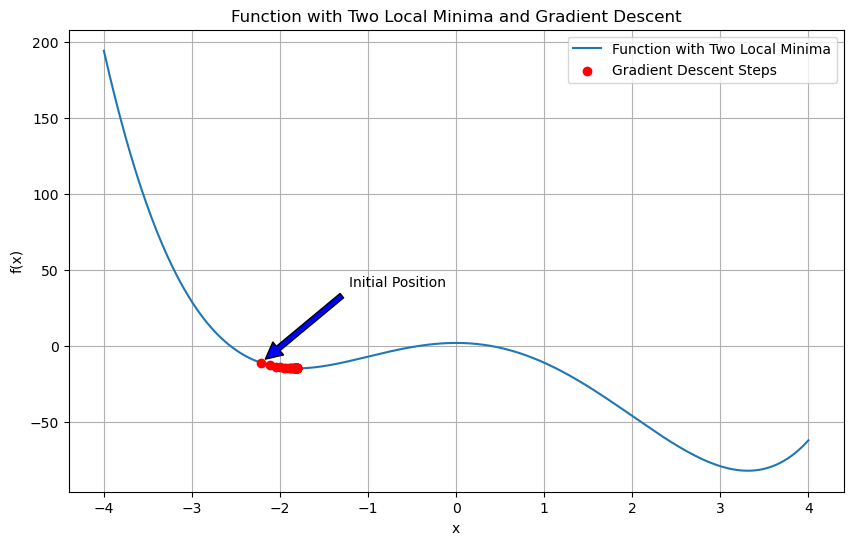

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    """Function with two local minima."""
    return x**4 - 2 * x**3 - 12 * x**2 + 2


def df(x):
    """Derivative of f."""
    return 4 * x**3 - 6 * x**2 - 24 * x


def gradient_descent(starting_point, learning_rate, num_iterations):
    """Run gradient descent and return the trajectory."""
    x = starting_point
    history = [x]
    for _ in range(num_iterations):
        x -= learning_rate * df(x)
        history.append(x)
    return np.array(history), f(np.array(history))


# Run from a random starting point
starting_point = np.random.uniform(-4, 4)
learning_rate = 0.005
num_iterations = 50

history, function_values = gradient_descent(starting_point, learning_rate, num_iterations)

# Plot
x_values = np.linspace(-4, 4, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Function with Two Local Minima')
plt.scatter(history, function_values, color='red', zorder=5, label='Gradient Descent Steps')
plt.plot(history, function_values, color='red', linestyle='dashed', zorder=5)
plt.annotate('Initial Position',
             xy=(history[0], function_values[0]),
             xytext=(history[0] + 1, function_values[0] + 50),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.title('Function with Two Local Minima and Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

<details>
<summary>Show Solution</summary>
The function defined in the script is 

$$
f(x) = x^4 - 2x^3 - 12x^2 + 2,
$$ 

and its derivative, which is used to calculate the gradient, is 
$$
f'(x) = 4x^3 - 6x^2 - 24x.
$$ 

The gradient descent rule applied in the script is 
$$
x_{\text{new}} = x - \eta \nabla f(x),
$$ where $\eta$ is the learning rate, and $\nabla f(x)$ is the gradient of the function at $x$.

When running the script multiple times with different random initial positions, you may observe that the gradient descent algorithm sometimes converges to one local minimum and sometimes to another. This behavior is because the function has two local minima, and the starting point significantly influences which minimum the algorithm will converge to.

If this function was the error function of your system and you aimed to achieve the lowest error, you could employ several strategies to increase the chances of finding the global minimum (the lowest error) rather than getting stuck in a local minimum:

1. **Multiple Initializations**: Run the gradient descent algorithm multiple times with different random initial positions. This strategy increases the likelihood of exploring different areas of the error landscape and potentially finding the global minimum.

2. **Adjusting the Learning Rate**: Experiment with different learning rates. A smaller learning rate can sometimes help make finer adjustments, which might lead to escaping shallow local minima, but it also makes the convergence process slower.

3. **Advanced Optimization Techniques**: Advanced optimization techniques are crucial in many areas of machine learning, including training neural networks. Two such techniques are Gradient Descent with Momentum and the Adam optimizer. These methods aim to improve upon the basic gradient descent algorithm by navigating complex error landscapes more effectively.

   - **Gradient Descent with Momentum** accelerates the convergence towards the optimal solution by incorporating the 'momentum' from previous steps. This can be particularly useful for overcoming the challenges posed by local minima. For an in-depth understanding, you might explore the paper: [On the importance of initialization and momentum in deep learning](http://proceedings.mlr.press/v28/sutskever13.html).

   - **Adam optimizer** adapts the learning rate for each parameter, combining ideas from other optimization algorithms to perform well on complex landscapes. The original paper on Adam, [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980), provides detailed insights.

By applying these strategies, you can enhance the odds of minimizing the error function to its lowest possible value, ensuring optimal performance for your system.
</details>


## Reinforcement Learning as an Optimisation Problem

In reinforcement learning, we are optimising the expected return $G_t$, defined as the sum of future rewards. In the case of a finite horizon:

$$G_t = R_{t+1} + R_{t+2} + R_{t+3} + \dots + R_{t+N}.$$

Alternatively, in an infinite horizon setting, where future rewards are discounted by a factor $\gamma$ to prioritise near-term rewards, the return is:

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + \dots$$

where

$$0 \leq \gamma < 1.$$

The discount factor $\gamma$ ensures that rewards far into the future contribute less to the expected return, effectively applying an exponential weighting to future rewards. This allows reinforcement learning to optimise in a finite window, as $\gamma^k$ becomes negligible for sufficiently large $k$.


At each time step, the agent is in a state $s_t$ and selects an action $a_t$. The goal of reinforcement learning is to learn the total future rewards $G_t$ resulting from choosing an action in a given state.

By accurately estimating the expected future reward, the agent can select good actions that lead to higher returns. This leads to two fundamental questions:
1.	How can we estimate the expected future return $G_t$ for each action?
2.	How do we pick an action, i.e., how do we define a policy? 

At its core, reinforcement learning is a problem of reward maximisation. However, many optimisation problems in machine learning are framed as minimisation rather than maximisation. To align reinforcement learning with typical optimisation frameworks, we can reformulate reinforcement learning as error minimisation. We can minimise the prediction error of the expected future reward. This is equivalent to ensuring that our learned estimates of $G_t$ are as accurate as possible.

## Multi-Armed Bandits

In reinforcement learning, we refer to **bandits** as a class of problems where an agent must choose between multiple possible actions, each yielding an immediate but uncertain reward. The term is inspired by slot machines ("one-armed bandits") found in casinos, though in our setup, bandits have **more than one arm**-hence the name multi-armed bandit problem.

Bandits provide a fundamental problem setup for **immediate rewards**, meaning that each action results in an observable reward without considering future consequences. Unlike full reinforcement learning problems, which involve delayed rewards and sequential decision-making, bandit problems focus solely on choosing the best action based on past experiences.

### Expected Returns in Bandit Problems

In bandits, we start from the generic discounted return:

$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots
$$

In a bandit trial, there is only one interaction step after choosing an action, so there are no future rewards within the same trial. Therefore, the return reduces to the immediate reward, and we can omit the time index in this one-step setting:

$$
G = R
$$

Following statistics terminology, we index repeated interactions as **trials**. For a single trial, if the chosen action is $A$, we write:

$$
G = R(A).
$$

Notation convention for this bandit section (important):
- $n$ indexes **trials** (actual agent-environment interactions).
- $i$ indexes **possible reward values** in a distribution (support points), for example in $\sum_i r_i P(R=r_i\mid A_n=a)$.

The **true expected return** for any action $a$, denoted as $q^*(a)$, is defined as the expected reward given that action:

$$
q^*(a) \doteq E[G \mid A_n = a] = E[R \mid A_n = a].
$$

The expectation above is across repeated one-step trials. An empirical estimate from observed trials is:

$$
E[R\mid A_n=a] \approx \frac{1}{N(a)}\sum_{n=1}^{N} R_n\,\mathbf{1}_{\{A_n=a\}},
$$

where $N(a)=\sum_{n=1}^N \mathbf{1}_{\{A_n=a\}}$ counts how many times action $a$ was selected.

In distribution form, this is:

$$
E[R\mid A_n=a] = \sum_{i} r_i~P\left(R=r_i \mid A_n=a \right),
$$

where:
- $r_i$ are possible reward values,
- $P\left(R=r_i \mid A_n=a \right)$ represents the probability of receiving reward $r_i$ when action $a$ is selected.

However, **the true reward distributions are unknown** to the agent. Instead, we make an assumption of **stationarity**, meaning that the probability distribution of rewards remains **constant over trials**:

$$
P\left(R \mid A_n=a \right) = P\left(R \mid A_{n'}=a \right)
$$

for any trials $n$ and $n'$ and across all actions $a$. This assumption allows the agent to track and estimate expected returns. In non-stationary environments, these probabilities may change over time, which complicates the problem and requires adaptive strategies.

### Estimating the Action-Value Function

Since the agent does not have direct access to the true expected reward $q^*(a)$, it must instead learn an estimate, denoted as the **Q-value**:

$$
Q(a) \approx q^*(a).
$$

To achieve this, we can start from the following requirement for the Q-values:

$$
E[(Q(a) - R)^2 \mid A_n = a] \approx 0,
$$

where $R$ is the observed reward drawn from $P(R \mid A_n = a)$. The intuition is that, on average, the estimated action value $Q(a)$ should be equal to the reward when choosing action $a$. The squared term is introduced for **mathematical convenience**, making the function differentiable and easier to work with.

By minimising an appropriately defined loss function based on the requirement for the Q-values, we are going to show that $Q(a)$ converges to $q^*(a)$.

### Defining the Loss Function

Guided by the requirement that $E[(Q(a) - R)^2 \mid A_n = a] \approx 0,$ we replace the expectation with the sample average in defining the loss function for the action $a$ as:

$$
L(a) = \frac{1}{2N(a)} \sum_{n=1}^{N} (Q(a) - R_n)^2 \mathbf{1}_{{A_n = a}}
$$

where:

- $N$ is the total number of trials.

- $N(a)$ is the total number of times action $a$ has been selected:

$$
N(a) = \sum_{n=1}^{N} \mathbf{1}_{A_n = a}.
$$

- $\mathbf{1}_{{A_n = a}}$ is the **indicator function**, which is defined as:

$$
\mathbf{1}_{{A_n = a}} =
\begin{cases}
1 & \text{if } A_n = a, \\
0 & \text{otherwise.}
\end{cases}
$$

- $R = R_n$ is the observed reward at trial $n$.

- The number 2 in the denominator is added for mathematical convenience.

We will show that minimising this loss function leads to the desired result: $Q(a) \approx q^*(a) = E[R \mid A_n = a]$.

### Minimising the Loss Function to Derive the Update Rule

Since the loss function is **convex** with respect to $Q(a)$, we can directly compute its minimum by setting the **derivative to zero**:

$$
\frac{d L(a)}{d Q(a)} = \frac{d}{d Q(a)} \left( \frac{1}{2N(a)} \sum_{n=1}^{N} (Q(a) - R_n)^2 \mathbf{1}_{{A_n = a}} \right) = 0.
$$

Applying the chain rule:

$$
\frac{1}{N(a)} \sum_{n=1}^{N} (Q(a) - R_n) \mathbf{1}_{{A_n = a}} = 0.
$$

Since $Q(a)$ is a constant with respect to the inner summation over $n$, it can be factored out:

$$
Q(a) \sum_{n=1}^{N} \mathbf{1}_{{A_n = a}} = \sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}}.
$$

and the sum of the indicator function gives how many times action $a$ was selected:

$$
Q(a) N(a) = \sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}}.
$$

Dividing both sides by $N(a)$:

$$
Q(a) = \frac{1}{N(a)} \sum_{n=1}^{N} R_n~\mathbf{1}_{{A_n = a}}.
$$

This shows that the optimal estimate $Q(a)$ is simply the **sample mean** of observed rewards for that action:

$$
Q(a) \approx E[R \mid A_n = a] = q^*(a).
$$

This result confirms that in a **stationary environment**, $Q(a)$ will converge to the **average reward observed when action $a$ was taken**.

### Gradient Update Rule

Following the section "Introduction to gradient descent", we define the gradient update rule as:

$$
\Delta Q(a)=- \eta N(a) \frac{d L(a)}{d Q}= -\eta\sum_{n=1}^{N} {\left(Q(a)-R_n\right) \mathbf{1}_{{A_n = a}}}
$$

where $\eta$ is the **learning rate**.

Note that we simply need to set $\Delta Q(a)$ proportional to the gradient. We introduce the factor $N(a)$ for **mathematical convenience**, allowing us to derive the desirable result more cleanly when computing the gradient.

This approach is referred to as a **batch update** because we first collect multiple observations before adjusting our estimate of $Q(a)$. At convergence, we expect to reach the same global minimum.


# Exercise 
Show that at convergence of the gradient update rule for bandits, $Q(a)$ recovers the true expected reward:$$Q(a) \approx E[R \mid A_n = a] = q^*(a).$$ 



<details>
<summary>Show Solution</summary>

The gradient update rule for bandits is given by:

$$
\Delta Q(a) = \eta \sum_{n=1}^{N} (R_n - Q(a)) \mathbf{1}_{{A_n = a}}.
$$

At **convergence**, the update should be zero:

$$
\sum_{n=1}^{N} (R_n - Q(a)) \mathbf{1}_{{A_n = a}} = 0.
$$

Expanding the summation:

$$
\sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}} - \sum_{n=1}^{N} Q(a) \mathbf{1}_{{A_n = a}} = 0.
$$

Since $Q(a)$ is **constant** with respect to the summation over $n$, it factors out:

$$
\sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}} - Q(a) \sum_{n=1}^{N} \mathbf{1}_{{A_n = a}} = 0.
$$

Recognizing that the sum of the indicator function counts the number of times action $a$ was selected:

$$
N(a) = \sum_{n=1}^{N} \mathbf{1}_{{A_n = a}},
$$

we rewrite the equation as:

$$
\sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}} = Q(a) N(a).
$$

Solving for $Q(a)$:

$$
Q(a) = \frac{1}{N(a)} \sum_{n=1}^{N} R_n \mathbf{1}_{{A_n = a}}.
$$

Since this represents the **sample mean** of observed rewards for action $ a$, we conclude:

$$
Q(a) \approx E[R \mid A_n = a] = q^*(a).
$$

Thus, the gradient update rule ensures that $Q(a)$ **converges to the true expected reward** $q^*(a)$.

</details>

## A single loss function for the multi-armed bandit problem

Previously we optimised as many error functions as arms independently, but more elegantly, we can consider a **single error function** with parameters being the $Q$-values of the arms, and calculate the update rule for the arms.

The total loss function is given by the sum of the previously defined $L(a)$ error functions over all actions $a$, representing the overall estimation error across all actions:

$$
L = \sum_{a=1}^{|A|} L(a)= \sum_{a=1}^{|A|} \left[ \frac{1}{2N(a)}\sum_{n=1}^{N} {\left(Q(a)-R_n\right)^2 \mathbf{1}_{{A_n = a}}} \right]
$$

where:

$A$ is the set of all possible actions and $|A|$ the cardinality of the set A, meaning the total number of available actions. For convenience we may simply write $\sum_a$ without explicitly specifying the limits when summing over all actions in $A$.

The indicator function $\mathbf{1}_{{A_n = a}}$ is defined as:

$$
\mathbf{1}_{{A_n = a}} =
\begin{cases}
1 & \text{if } A_n = a \\
0 & \text{otherwise.}
\end{cases}
$$

$N$ is the total number of trials and $N(a)$ is the number of trials where action $a$ was selected:

$$
N(a) = \sum_{n=1}^{N} \mathbf{1}_{{A_n = a}}
$$

Since exactly one action is selected per trial, the per-action counts partition the total:

$$
N = \sum_a N(a)
$$

$R = R_n$ is the observed reward at trial $n$.

### Deriving the Update Rule
Without loss of generality, let us take the partial derivative of $L$ with respect to $Q(1)$, i.e., for action $a=1$:

$$
\frac{\partial L}{\partial Q(1)} = \frac{\partial}{\partial Q(1)} \left( \frac{1}{2N(1)} \sum_n (Q(1)-R_n)^2 \mathbf{1}_{{A_n = 1}} \right)
$$

Applying the chain rule:

$$
\frac{\partial L}{\partial Q(1)} = \frac{1}{N(1)} \sum_n (Q(1)-R_n) \mathbf{1}_{{A_n = 1}}
$$

The summation over $a$ disappears because we are differentiating with respect to one particular action-value $Q(1)$, hence the terms relating to $Q(2)$, $Q(3)$ etc remain constants because changing $Q(1)$ will not affect them. Following the same convention as before (multiplying the gradient by $N(a)$ for convenience), the update rule follows:

$$
\Delta Q(1) = \eta \sum_n (R_n - Q(1)) \mathbf{1}_{{A_n = 1}}
$$

More generally, for any action $a$:

$$
\Delta Q(a) = \eta  \sum_n (R_n - Q(a)) \mathbf{1}_{{A_n = a}}
$$

# Exercise 

Start from the single error function $L$ for a bandit. Show that at steady state:

$$ Q(a) \approx E[R \mid A_n=a]$$

<details>
<summary>Show Solution</summary>

We calculate:

$$\frac{\partial L} {\partial Q(a)} = \frac{\partial}{\partial Q(a)} \left( \sum_a \frac{1}{2N(a)} \sum_n (R_n - Q(a))^2 \mathbf{1}_{{A_n = a}} \right).$$


Applying the chain rule:

$$\frac{\partial L}{\partial Q(a)} = \frac{1}{N(a)}\sum_n ( Q(a)-R_n) \mathbf{1}_{{A_n = a}}$$

The $\sum_a $ drops because we are taking the partial derivative with respect to one of these actions $a$, hence the terms related to the other actions are considered constants.

We then set the gradient to zero and solve for $Q(a)$:

$$0 =  \sum_n (Q(a)-R_n) \mathbf{1}_{{A_n = a}}$$

Rearranging the terms gives us:

$$ \sum_n Q(a) \cdot \mathbf{1}_{{A_n = a}}= \sum_n R_n \cdot \mathbf{1}_{{A_n = a}} $$

Since $Q(a)$ is a constant with respect to the inner sum over $n$, it can be factored out:

$$ Q(a) \cdot \sum_n \mathbf{1}_{{A_n = a}} = \sum_n R_n \cdot \mathbf{1}_{{A_n = a}}$$

This leads us to the update rule for $Q(a)$ at the minimum of the error function:


$$Q(a) = \frac{\sum_{n} R_n \cdot \mathbf{1}_{{A_n = a}}}{\sum_n \mathbf{1}_{{A_n = a}}}\approx E[R \mid A_n=a]$$

This shows that the updated estimate of $Q(a)$ for each arm $a$ is the average of the rewards received when that arm is selected.
</details>

## Batch vs Online Bandit Update Rule

The update rules we have derived so far are **batch**: we first collect all $N$ observations and then make a single update informed by the entire dataset. The batch gradient update from the previous section is:

$$
\Delta Q(a) = -\eta \sum_{n=1}^{N} {\left(Q(a)-R_n \right) \mathbf{1}_{{A_n = a}}}
$$

In contrast, **online learning** updates the estimate after each individual trial. If we update after trial $n$, only one observation $(A_n, R_n)$ is available, so the sum reduces to a single term:

$$
\Delta Q(a) = -\eta \left(Q(a)-R_n \right)\mathbf{1}_{{A_n = a}}.
$$

This is the online update rule. The question is whether updating one trial at a time still leads to a meaningful result. Below, we show that it does — in a stationary environment the online rule converges to the same sample mean as the batch solution.

### Stationary environment
At trial $n$, after observing $(A_n, R_n)$:

$$
N(a) \leftarrow N(a) + \mathbf{1}_{\{A_n=a\}},
$$

$$
Q(a) \leftarrow Q(a) + \frac{1}{N(a)}\,\mathbf{1}_{\{A_n=a\}}\left(R_n-Q(a)\right).
$$

So $Q(a)$ is updated only when action $a$ is selected, and in stationary settings this converges to the sample mean reward for that action.

### Non-stationary environment
For a **fixed learning rate** $\eta$, use:

$$
Q(a) \leftarrow Q(a) + \eta\,\mathbf{1}_{\{A_n=a\}}\left(R_n-Q(a)\right).
$$

If $A_n=a$, this is:

$$
Q(a) \leftarrow (1-\eta)Q(a)+\eta R_n.
$$

This means the estimate follows an **exponential moving average**, where older observations retain weight $(1-\eta)$.

- When **$\eta$ is small**, updates are slow, and past rewards strongly influence $Q(a)$.
- When **$\eta$ is large**, new observations have greater influence, making the estimate more adaptive to changes in the environment.

Therefore, when the reward distribution changes over time, one should choose the fixed-step-size rule for non-stationary environments.


# Exercise
Show that for a fixed action $a$, the online update rule for stationary environments with step size $\frac{1}{N(a)}$:

$$
Q(a) \leftarrow Q(a) + \frac{1}{N(a)}\left(R_n - Q(a)\right),
$$

produces $Q(a)$ equal to the sample mean of all rewards observed when action $a$ was selected.


<details>
<summary>Show Solution</summary>

We introduce one additional counter to avoid the use of indicator function:

- $k$: the number of times action $a$ has been selected.

Let $Q_k(a)$ be the value of $Q(a)$ after $k$ selections of action $a$, and let $R_a^{(k)}$ be the reward observed on the $k$-th selection.

Then the sample-average update becomes:

$$
Q_{k+1}(a)=Q_k(a)+\frac{1}{k+1}\left(R_a^{(k+1)}-Q_k(a)\right).
$$

#### **Base Case ($k=0$)**
Assume $Q_0(a)=0$. After the first time action $a$ is selected:

$$
Q_1(a)=R_a^{(1)}.
$$

#### **Inductive Hypothesis**
Assume after $k$ selections of action $a$:

$$
Q_k(a)=\frac{1}{k}\sum_{j=1}^{k}R_a^{(j)}.
$$

#### **Inductive Step**
Using the update:

$$
Q_{k+1}(a)=Q_k(a)+\frac{1}{k+1}\left(R_a^{(k+1)}-Q_k(a)\right),
$$

substitute the hypothesis:

$$
Q_{k+1}(a)=\frac{1}{k}\sum_{j=1}^{k}R_a^{(j)}+\frac{1}{k+1}\left(R_a^{(k+1)}-\frac{1}{k}\sum_{j=1}^{k}R_a^{(j)}\right),
$$

which simplifies to:

$$
Q_{k+1}(a)=\frac{1}{k+1}\sum_{j=1}^{k+1}R_a^{(j)}.
$$

Thus, by induction, the iterates equal the sample mean. Returning to default notation, the current value after trial $n$ can be written as:

$$
Q(a)=\frac{1}{N(a)}\sum_{n'=1}^{n}R_{n'}\,\mathbf{1}_{\{A_{n'}=a\}}.
$$

So the online rule with step size $1/N(a)$ converges to the empirical mean reward for each action in a stationary environment.
</details>


# Exercise

We have previously seen the leaky integrator model (known as exponential average in its discrete form):

$$\tau \frac{dX}{dt} = -X + I(t),$$

where $X$ is the updated quantity, $I(t)$ is an external input, and $\tau$ is a time constant.

Notation note: here $I(t)$ is a continuous-time input signal.

Show that this model exhibits exponential forgetting by setting $I(t) = 0$. You can do this by replacing both sides with an appropriate exponential function and verify that it satisfies the equation.

Demonstrate that the online update rule for the $Q(a)$ values relates to the leaky integrator differential equation seen earlier.


<details>
<summary>Show Solution</summary>

The leaky integrator model is given by:

$$\tau \frac{dX}{dt} = -X + I(t),$$

where $X$ is the quantity being updated, $I(t)$ is an external input, and $\tau$ is a time constant.

Notation note: $I(t)$ here is an input function of continuous time, not the index $i$ used in the bandit distribution sum.

**Exponential Forgetting ($I(t) = 0$)**

Setting $I(t) = 0$, the equation simplifies to:

$$\tau \frac{dX}{dt} = -X.$$

This is a standard first-order linear differential equation. To solve, assume a solution of the form:

$$X(t) = C e^{-t/\tau}.$$

Differentiating:

$$\frac{dX}{dt} = -\frac{C}{\tau} e^{-t/\tau}.$$

Substituting into the differential equation:

$$\tau \left(-\frac{C}{\tau} e^{-t/\tau} \right) = -C e^{-t/\tau},$$

which simplifies to an identity, confirming that:

$$X(t) = C e^{-t/\tau}$$

is the correct solution, demonstrating exponential decay or forgetting over time.


**Discretisation and Connection to Online Updates**

Approximating the derivative using its definition leads to:

$$\tau \frac{\Delta X}{\Delta t} \approx -X + I(t),$$

solving for $\Delta X$:

$$\Delta X = \frac{\Delta t}{\tau} (I(t) - X).$$

Defining the learning rate as:

$$\eta = \frac{\Delta t}{\tau},$$

this becomes:

$$\Delta X = \eta (I(t) - X).$$

Recognising that by considering $X$ as the estimated reward $Q(a)$ and $I(t)$ as the received reward $R_n$, we obtain the familiar online update rule:

$$\Delta Q(a) = \eta (R_n - Q(a)).$$

This shows that the online update rule is a discrete-time approximation of the leaky integrator model.


</details>


## Policies and the Exploration-Exploitation Dilemma 

Imagine you're navigating the diverse culinary landscape of a new city. After several dining experiences, you discover a restaurant that exceeds all expectations. Now, you face a classic decision: to explore further or to exploit this find. Exploring entails the risk of less satisfying meals, while exploiting ensures enjoyment but may preclude the discovery of superior options. This scenario illustrates the exploration-exploitation dilemma in reinforcement learning, where agents must balance the pursuit of known rewards against the potential of discovering greater rewards through exploration.

In reinforcement learning, the probability by which an agent chooses their actions is known as a **policy**. Several policies exist, that navigate the exploration-exploitation dilemma in different ways. Here, we will present fixed policies, and discuss their benefits and drawbacks:

- **Greedy Policy**: This policy always selects the action with the highest estimated reward based on current knowledge. It is formally expressed as:

  $$a_n = \underset{a}{\mathrm{argmax}}\ Q(a)$$

  Here, $\underset{a}{\mathrm{argmax}}\ Q(a)$ returns the action $a$ that maximizes the current estimated reward. While the greedy policy maximizes immediate rewards, it may overlook potentially higher rewards from less-explored actions.

- **Optimistic Greedy Policy**: An optimistic initialization encourages exploration by starting with a high initial estimate for all actions. The action selection mechanism is the same as the greedy policy, but the initial optimism motivates exploration early on. This can be represented by initializing $Q(a)$ to a value higher than any expected reward, promoting exploration of all actions before converging to exploitation.

- **Epsilon-Greedy Policy**: This policy introduces a probability $\epsilon$ to explore random actions, allowing the agent to intermittently diverge from the greedy choice. It can be mathematically described as:

  $$a_n = \begin{cases} 
  \text{a random action} & \text{with probability } \epsilon \\
  \underset{a}{\mathrm{argmax}}\ Q(a) & \text{with probability } 1 - \epsilon
  \end{cases}$$

  In this context, $\text{a random action}$ with probability $\epsilon$ allows for exploration, and $\underset{a}{\mathrm{argmax}}\ Q(a)$ with probability $1 - \epsilon$ chooses the action believed to offer the highest reward, thus balancing exploration and exploitation.

- **Softmax Policy**: Unlike the aforementioned policies that make decisions based on a deterministic or semi-random criterion, the Softmax policy selects actions based on a probability distribution over the estimated rewards. The probability of selecting action $a$ at trial $n$ is given by:

  $$P(a) = \frac{e^{Q(a)/\tau}}{\sum_{b} e^{Q(b)/\tau}}$$

  where $\tau$ is a temperature parameter that modulates the degree of exploration: a high $\tau$ results in more exploratory behavior, while a low $\tau$ makes the policy behave more greedily. This policy elegantly balances exploration and exploitation by probabilistically favoring actions with higher expected rewards but still allowing for exploration.

These policies represent distinct approaches to navigating the exploration-exploitation trade-off. The **Greedy Policy** prioritizes known rewards, potentially at the cost of missing out on better options. The **Optimistic Greedy Policy** mitigates this by fostering initial exploration through optimistic value estimates. The **Epsilon-Greedy Policy** offers a compromise, allowing for controlled exploration while primarily focusing on exploiting known information. The **Softmax Policy** provides a probabilistic method for action selection, smoothly transitioning between exploration and exploitation based on the temperature parameter $\tau$.

The policy is the final ingredient needed to fully define the multi-armed bandit problem.


## The Multi-Armed Bandit Problem

Now that we have defined rewards, action-value estimates, and policies, we can fully describe the multi-armed bandit problem, which is essentially a decision-making problem.

1. **Environment**:  
   - In the multi-armed bandit problem the environment consists of a single state.  
   - The environment consists of multiple actions, e.g. **10 actions** $a \in \{1, 2, \ldots, 10\}$, each associated with a reward probability distribution.  
   - The true expected reward $q^*(a)$ for each action $a$ is unknown to the agent.

2. **Agent**:  
   - The agent interacts with the environment by selecting actions over a series of trials.  
   - The agent's knowledge about the environment is encapsulated in its policy $\pi$.

3. **Policy ($\pi$)**:  
   - A policy $\pi$ determines how the agent selects actions based on past observations and rewards.  
   - The policy can be **deterministic** or **stochastic**.

### Algorithm Outline

1. **Initialization**:  
   - Initialize the estimate of action-value $Q(a)$ for all $a$.  
   - Initialize the count $N(a)$ of times each action has been selected to $0$.  
   - Set N to the total number of trials.

2. **For n = 1 to N, do**:  
   
   - **Policy Decision**: 
       Based on the current action-value estimates $Q(a)$, select an action $a$ using policy $\pi$ (e.g. Epsilon-Greedy).  
   
   - **Action and Reward**: Take action $a$, and observe reward $R_n$.  

   - **Increase counter**:  
      $$ N(a) = N(a) + 1 $$

   - **Update Action-Value Estimates**:  
      For **stationary environments**:  
      $$ Q(a) = Q(a) + \frac{1}{N(a)}(R_n - Q(a)) $$

3. **Optional bookkeeping for proofs/plots/code**:
   - If you store the full trajectory, denote it as $Q_n(a)$, or in code as an array like `Q_history[n, a]`.
   - This indexed form is for tracking evolution; the update rule itself is still written on the current value $Q(a)$.

### Objective

The objective of the algorithm is to maximize the cumulative expected reward over trials.

### Non-Stationary Environments

The algorithm above can be adjusted by modifying the update rule as:  
$$ Q(a) = Q(a) + \eta (R_n - Q(a)) $$
where $\eta$ is a fixed step size (learning rate), ensuring that past rewards do not dominate future updates. A decaying learning rate can help mitigate instability and improve adaptability in non-stationary environments, as discussed earlier.


# Exercise

We will explore bandits where rewards follow a binomial distribution, and where rare rewards are more valuable than common ones. Such conditions can lead agents to prematurely favor certain arms, being "trapped" in what is perceived as the best option based on incomplete information. Adjusting the policy becomes crucial to train an effective agent in these environments.

The provided code snippet (below) outlines a basic framework for a 10-arm bandit problem, in a stationary environment. Executing this code will reveal the expected rewards for each arm. Key (hyper-)parameters for exploration include the learning rate, which indicates the rate at which $Q$ estimates are updated; epsilon, determining the balance between exploration and exploitation for the Epsilon-Greedy; and the temperature parameter for the Softmax policy, which adjusts the degree of exploration based on the reward distribution. By hyper-parameters, we refer to parameters that do not directly change as a consequence of the algorithmic updates, but you can set them and they affect the learning; to distinguish them from the "learnable" parameters, those that are adapted by the algorithm, in our case, the $Q$ values.

Note the intentional gaps left for you to fill in, such as policy implementations and the agent update rule. The `np.random.choice` function will be instrumental in implementing the softmax policy.

The code follows the OOP pattern from the primer (Notebook 0, Section 6): the environment is a class (`BanditProblem`), the learner is a class (`BanditAgent`) that stores and updates $Q$, and each policy is a lightweight class with a `select_action(Q)` method. The agent receives its policy via composition (`self.policy = policy`), so policies can be swapped without rewriting the agent. The simulation loop is a standalone function — it has no state of its own.

After filling in the gaps, try different parameters to deepen your understanding of exploration/exploitation, noise, and learning rate, and confirm the concepts we discussed previously. A large part in such models is tuning, selecting the hyper-parameters appropriately to obtain good performance.

You could also enhance the policies, particularly the Epsilon-Greedy and Softmax strategies, as well as the learning rate scheme by heuristics. You could expand the implementation to also return cumulative average reward, so your graphs will be smoother, and you may need to average across fewer episodes, or remove the need for additional smoothing. We will not provide those in the solution and leave it to you to devise and implement.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class BanditProblem:
    """Multi-armed bandit with binary rewards of varying magnitude."""

    def __init__(self, k=10):
        self.k = k
        self.p_success = np.random.uniform(0.1, 0.9, self.k)
        self.reward_magnitude = (1 / self.p_success - 1)

    def get_reward(self, action):
        success = np.random.rand() < self.p_success[action]
        return success * self.reward_magnitude[action]

    def return_expectations(self):
        return self.p_success * self.reward_magnitude

    def return_arms(self):
        return self.k

    def plot_reward_frequency(self):
        arms = np.arange(1, self.k + 1)
        plt.figure(figsize=(10, 6))
        plt.bar(arms, self.p_success, color='blue')
        plt.title('Reward Frequency for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Reward Frequency')
        plt.xticks(arms)
        plt.show()

    def plot_true_reward_distributions(self):
        arms = np.arange(1, self.k + 1)
        plt.figure(figsize=(10, 6))
        plt.bar(arms, self.return_expectations(), color='skyblue')
        plt.title('Expected Reward for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Expected Reward')
        plt.xticks(arms)
        plt.show()


class EpsilonGreedyPolicy:
    """Decision rule: usually pick the best, sometimes explore."""

    def __init__(self, epsilon):
        self.epsilon = epsilon

    def select_action(self, Q):
        """Given Q-values, return an action.

        TODO: implement epsilon-greedy with random tie-breaking.
        Placeholder: uniform random action to keep notebook runnable."""
        return np.random.randint(len(Q))


class SoftmaxPolicy:
    """Decision rule: sample actions proportional to estimated values."""

    def __init__(self, tau):
        self.tau = tau

    def select_action(self, Q):
        """Given Q-values, return an action.

        TODO: implement softmax action selection.
        Placeholder: uniform random action to keep notebook runnable."""
        return np.random.randint(len(Q))


class BanditAgent:
    """Learner that stores action-value estimates and updates them."""

    def __init__(self, num_actions, eta, policy):
        self.num_actions = num_actions
        self.eta = eta
        self.policy = policy
        self.reset()

    def reset(self):
        self.Q = np.zeros(self.num_actions)
        self.action_counts = np.zeros(self.num_actions, dtype=int)

    def select_action(self):
        return self.policy.select_action(self.Q)

    def update(self, action, reward):
        """TODO: implement constant step-size update for Q(action)."""
        return


def simulate_bandit(agent, bandit, trials=100):
    reward_history = np.zeros(trials)
    agent.reset()
    for n in range(trials):
        action = agent.select_action()
        reward = bandit.get_reward(action)
        agent.update(action, reward)
        reward_history[n] = reward
    return reward_history


def smooth_data(data, alpha=0.1):
    if len(data) == 0:
        return np.array([])
    smoothed = np.zeros(len(data))
    smoothed[0] = data[0]
    for i in range(1, len(data)):
        smoothed[i] = (1 - alpha) * smoothed[i - 1] + alpha * data[i]
    return smoothed


def simulate_and_average(bandit, policy, eta, trials=100, runs=10):
    num_actions = bandit.return_arms()
    total_rewards = np.zeros(trials)
    for _ in range(runs):
        agent = BanditAgent(num_actions, eta, policy)
        total_rewards += simulate_bandit(agent, bandit, trials)
    return smooth_data(total_rewards / runs, alpha=0.01)


k = 10
trials = 1000  # shorter for test
runs = 5
my_bandit = BanditProblem(k)
my_bandit.plot_true_reward_distributions()
my_bandit.plot_reward_frequency()



<details>
  <summary>Show Solution</summary>

 ```python
import numpy as np
import matplotlib.pyplot as plt


class BanditProblem:
    """Multi-armed bandit with binary rewards of varying magnitude."""

    def __init__(self, k=10):
        """
        Args:
            k (int): Number of arms.
        """
        self.k = k
        self.p_success = np.random.uniform(0.1, 0.9, self.k)
        self.reward_magnitude = (1 / self.p_success - 1)

    def get_reward(self, action):
        """Sample a reward from the chosen arm."""
        success = np.random.rand() < self.p_success[action]
        return success * self.reward_magnitude[action]

    def return_expectations(self):
        """Return the true expected reward for each arm."""
        return self.p_success * self.reward_magnitude

    def return_arms(self):
        """Return the number of arms."""
        return self.k

    def plot_reward_frequency(self):
        """Bar chart of success probabilities."""
        arms = np.arange(1, self.k + 1)
        plt.figure(figsize=(10, 6))
        plt.bar(arms, self.p_success, color='blue')
        plt.title('Reward Frequency for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Reward Frequency')
        plt.xticks(arms)
        plt.show()

    def plot_true_reward_distributions(self):
        """Bar chart of expected rewards per arm."""
        arms = np.arange(1, self.k + 1)
        plt.figure(figsize=(10, 6))
        plt.bar(arms, self.return_expectations(), color='skyblue')
        plt.title('Expected Reward for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Expected Reward')
        plt.xticks(arms)
        plt.show()


# --- Policies (classes, following Notebook 0 Section 6) ---

class EpsilonGreedyPolicy:
    """Decision rule: usually pick the best, sometimes explore."""

    def __init__(self, epsilon):
        """
        Args:
            epsilon (float): Probability of choosing a random action.
        """
        self.epsilon = epsilon

    def select_action(self, Q):
        """Given Q-values, return an action."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(Q))
        max_q = np.max(Q)
        best_actions = np.where(Q == max_q)[0]
        return np.random.choice(best_actions)


class SoftmaxPolicy:
    """Decision rule: sample actions proportional to estimated values."""

    def __init__(self, tau):
        """
        Args:
            tau (float): Temperature parameter (higher = more exploration).
        """
        self.tau = tau

    def select_action(self, Q):
        """Given Q-values, return an action."""
        scaled = Q / max(self.tau, 1e-8)
        shifted = scaled - np.max(scaled)
        exp_q = np.exp(shifted)
        probabilities = exp_q / np.sum(exp_q)
        return np.random.choice(len(Q), p=probabilities)


class BanditAgent:
    """Learner that stores action-value estimates and updates them.

    The action-selection policy is passed in as a component (composition).
    """

    def __init__(self, num_actions, eta, policy):
        """
        Args:
            num_actions (int): Number of available actions.
            eta (float): Learning rate.
            policy: An object with a select_action(Q) method.
        """
        self.num_actions = num_actions
        self.eta = eta
        self.policy = policy
        self.reset()

    def reset(self):
        """Reset internal estimates and action counts."""
        self.Q = np.zeros(self.num_actions)
        self.action_counts = np.zeros(self.num_actions, dtype=int)

    def select_action(self):
        """Select an action by delegating to the policy."""
        return self.policy.select_action(self.Q)

    def update(self, action, reward):
        """Constant step-size update for the selected action."""
        self.action_counts[action] += 1
        self.Q[action] += self.eta * (reward - self.Q[action])


# --- Simulation helpers (standalone functions — no state needed) ---

def simulate_bandit(agent, bandit, trials=100):
    """Run one bandit training run and return rewards per trial."""
    reward_history = np.zeros(trials)
    agent.reset()
    for n in range(trials):
        action = agent.select_action()
        reward = bandit.get_reward(action)
        agent.update(action, reward)
        reward_history[n] = reward
    return reward_history


def smooth_data(data, alpha=0.1):
    """Exponential moving average for smoothing a time series."""
    if len(data) == 0:
        return np.array([])
    smoothed = np.zeros(len(data))
    smoothed[0] = data[0]
    for i in range(1, len(data)):
        smoothed[i] = (1 - alpha) * smoothed[i - 1] + alpha * data[i]
    return smoothed


def simulate_and_average(bandit, policy, eta, trials=100, runs=10):
    """Average reward curves over independent runs, then smooth."""
    num_actions = bandit.return_arms()
    total_rewards = np.zeros(trials)
    for _ in range(runs):
        agent = BanditAgent(num_actions, eta, policy)
        total_rewards += simulate_bandit(agent, bandit, trials)
    return smooth_data(total_rewards / runs, alpha=0.01)


# --- Main ---

k = 10
trials = 10000
runs = 100
epsilon = 0.2
tau = 0.3
eta = 0.001

my_bandit = BanditProblem(k)
my_bandit.plot_true_reward_distributions()
my_bandit.plot_reward_frequency()

rewards_eg = simulate_and_average(
    my_bandit, EpsilonGreedyPolicy(epsilon=epsilon), eta,
    trials=trials, runs=runs
)
rewards_g = simulate_and_average(
    my_bandit, EpsilonGreedyPolicy(epsilon=0), eta,
    trials=trials, runs=runs
)
rewards_sm = simulate_and_average(
    my_bandit, SoftmaxPolicy(tau=tau), eta,
    trials=trials, runs=runs
)

print("True mean rewards:\n", my_bandit.return_expectations())

plt.figure(figsize=(10, 6))
plt.plot(rewards_eg, label='Epsilon-Greedy')
plt.plot(rewards_g,  label='Greedy')
plt.plot(rewards_sm, label='Soft-Max')
max_r = np.max(my_bandit.return_expectations())
mean_r = np.mean(my_bandit.return_expectations())
plt.axhline(y=max_r, color='r', linestyle='--', label=f'Max Expected: {max_r:.2f}')
plt.axhline(y=mean_r, color='b', linestyle='--', label=f'Mean Expected: {mean_r:.2f}')
plt.xlabel('Trials')
plt.ylabel('Average Reward')
plt.title('Performance of Various Policies Over Time')
plt.legend()
plt.show()

```
</details>
